This is a simple neural network built from scratch using numpy only. it consists of a single hidden layer with adjustable size to accomodate varying inputs. Tested successfully on the MNIST handwritten numbers dataset recognising if a number is 4(label 1) or 9(label 0). Model achieved over 70% accuracy after running for 80 epochs on a 8 hidden node network with weights and biases between 0 & 1. The accuracy went above 95% when the weights/biases into the node were set to (0,1/28) and weights/biases to the output were set to (0,1/8**-2).

In [1]:
import scipy.io as sc
from scipy.special import expit as sigm
import numpy as np
import matplotlib.pyplot as plt

#loads sample test/train data
x = sc.loadmat('train_x_v7.mat')
y = sc.loadmat('train_y_v7.mat')
x_train = x['train_x']
y_train = y['train_y']

x = sc.loadmat('test_x_v7.mat')
y = sc.loadmat('test_y_v7.mat')
x_test = x['test_x']
y_test = y['test_y']

#np.random.seed(None)

Applying SGD to train the neural network, run SGD up to 80 epochs. Consider the following initialization of the parameters
 W=N(0,1) B=N(0,1)
 
The functions listed below form the neural network which is initiated by calling the train function. The different functions and their purposes is as follows:-

*init_params* : initialises the hidden layer size, weights and biases.

*sigmoid* : sigmoid function and its derivative. used as an activation function in the hidden layer.

*f_prop* : carries out a single forward propagation of the network based on the mathematical operations of a neural network and returns the output labels & the hidden layer outputs required for calculating the back propagation error.

*back_prop* : calculates the error in our forward propagation from the real labels/outputs. returns the error in both our weights and biases for the hidden layer and output layer.

*update_params* : updates our weights and biases accordingly.

*train* : initialises and runs the network. By default returns the errors but can be modified to return the calculated weights and biases. The alt setting is for changing the weights/biases initialisation to (0,1/28) and (0,1/8**-2) to improve accuracy. alpha rate is used to update params so it doenst ovefit or overload the buffer and give and overflow error (we wouldnt want our training to end too early and give false results).

*train_loss, train_accu, test_loss, test_accu* : As the names suggests, calculates training/testing accuracy/loss. The dataset size has been hard coded in and needs to be changed to recieve accurate values and avoid errors.

*predictions* : predicts if a number is 4 or 9 based on our network output. used to calculate accuracy

In [2]:
def init_params(hidden,alt=False):
    inputSize = 784
    outputSize = 1
    hiddenSize = hidden
        
    if alt:
        #We initialise weights & biases N(0,1/sqrt(8)) and N(1,1/28)
        W1 = np.random.normal(0,1/28,(hiddenSize, inputSize))
        W2 = np.random.normal(0,1/np.sqrt(8),(outputSize,hiddenSize))
        
        B1 = np.random.normal(0,1/28,(hiddenSize,1))
        B2 = np.random.normal(0,1/np.sqrt(8),(outputSize,1))
        
        return W1,W2,B1,B2
    
    #we initialise weights N(0,1)
    W1 = np.random.randn(hiddenSize, inputSize)
    W2 = np.random.randn(outputSize, hiddenSize)
        
    #biases
    B1 = np.random.randn(hiddenSize,1)
    B2 = np.random.randn(outputSize,1)
    
    return W1,W2,B1,B2

#sigmoid function with derivative
def sigmoid(x, derivative=False):
    sig=sigm(x)
    if derivative:
        return sig*(1-sig)
    return sig

#forward propagation of the network
def f_prop(W1,W2,B1,B2,X):
    X=np.array(X)
    z1 = np.matmul(W1,X) + B1
    a1 = sigmoid(z1)
    z2 = np.matmul(W2,a1) + B2
    y_cap = z2
    return z1,a1,y_cap
    
#back propagation of the network
def back_prop(X,Y,W1,W2,z1,a1,y_cap):
    Y=np.array(Y)
    X=np.array(X)
    
    d2 = y_cap.T - Y
    d1 = (np.matmul(d2,W2)).T*sigmoid(z1,derivative=True)
        
    w2_error = np.matmul(d2.T,a1.T)
    w1_error = np.matmul(d1,X.T)
    b1_error = np.reshape(np.mean(d1,axis=1),(len(W2[0]),1))
    b2_error = np.mean(d2)
    
    return w2_error,w1_error,b1_error,b2_error

#gradient descent
def update_params(W1,W2,B1,B2,w1_error,w2_error,b1_error,b2_error,alpha):
        
    W1 -= w1_error * alpha
    W2 -= w2_error * alpha
    B1 -= b1_error * alpha
    B2 -= b2_error * alpha
    
    return W1,W2,B1,B2

#Training function
def train(X, Y, x_test, y_test, hidden=8, iter=80, alpha=0.001,alt=False):
    W1,W2,B1,B2 = init_params(hidden,alt=alt)
    train_error = []
    tr_accu = []
    test_error = []
    te_accu = []
    for i in range(iter):
        Z1,A1,y_cap = f_prop(W1,W2,B1,B2,X)
        w2_error,w1_error,b1_error,b2_error = back_prop(X,Y,W1,W2,Z1,A1,y_cap)
        W1,W2,B1,B2 = update_params(W1,W2,B1,B2,w1_error,w2_error,b1_error,b2_error,alpha)
        train_error.append(train_loss(y_cap,y_train))
        tr_accu.append(train_accu(y_cap,y_train))
        
        _,_,yt_cap = f_prop(W1,W2,B1,B2,x_test)
        test_error.append(test_loss(yt_cap,y_test))
        te_accu.append(test_accu(yt_cap,y_test))
        
#         if i%100==0:
#             loss = train_loss(y_cap,y_train)
#             accu = train_accu(y_cap.T,y_train)
#             print('loss:',loss)
#             print('accuracy',accu)
#             print()
            
    return train_error,test_error,tr_accu,te_accu
 
def train_loss(y_cap,y):
    y_cap=np.array(y_cap.T)
    y=np.array(y)
    sigma = 1/2 * ((y_cap-y)**2)
    theta = 1/512 * np.sum(sigma)
    return theta

def train_accu(y_cap,y):
    y_cap=np.array(y_cap)
    y=np.array(y)
    q = predictions(y_cap)
    acc = 1 - 1/512 * np.sum(np.abs(q-y.T))
    return acc

def predictions(y_cap):
    ret = y_cap.T
    ret = [1 if i>=0.5 else 0 for i in ret]
    ret = np.array(ret)
    return ret

def test_loss(y_cap,y):
    y_cap=np.array(y_cap.T)
    y=np.array(y)
    sigma = 1/2 * ((y_cap-y)**2)
    theta = 1/128 * np.sum(sigma)
    return theta

def test_accu(y_cap,y):
    y_cap=np.array(y_cap)
    y=np.array(y)
    q = predictions(y_cap)
    acc = 1 - 1/128 * np.sum(np.abs(q-y.T))
    return acc

In [3]:
#we train our model here
error_train, error_test, tr_accu, te_accu=train(x_train,y_train,x_test,y_test)

training error and testing error over the number of epochs

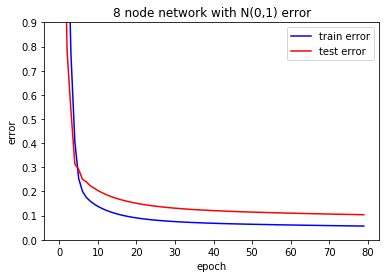

In [4]:
plt.plot(error_train,color='b',label='train error')
plt.plot(error_test,color='r',label='test error')

plt.xlabel("epoch")
plt.ylabel("error")
plt.ylim([0,0.9])
plt.title("8 node network with N(0,1) error")
plt.legend()
plt.show()

training accuracy and test accuracy of the network over the number of epochs

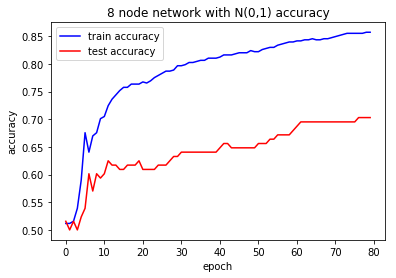

In [5]:
plt.plot(tr_accu,color='b',label='train accuracy')
plt.plot(te_accu,color='r',label='test accuracy')

plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("8 node network with N(0,1) accuracy")
plt.legend()
plt.show()

network with weights and biases N(0,1/28) and N(0,1/sqrt(8))

In [6]:
error_train, error_test, tr_accu, te_accu=train(x_train,y_train,x_test,y_test,alt=True)

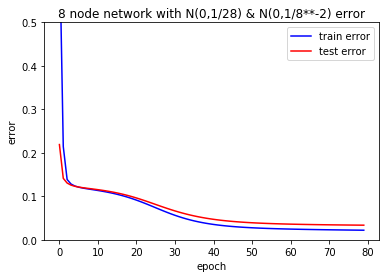

In [7]:
plt.plot(error_train,color='b',label='train error')
plt.plot(error_test,color='r',label='test error')

plt.xlabel("epoch")
plt.ylabel("error")
plt.ylim([0,0.5])
plt.title("8 node network with N(0,1/28) & N(0,1/8**-2) error")
plt.legend()
plt.show()

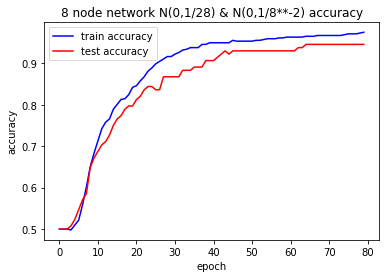

In [8]:
plt.plot(tr_accu,color='b',label='train accuracy')
plt.plot(te_accu,color='r',label='test accuracy')

plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("8 node network N(0,1/28) & N(0,1/8**-2) accuracy")
plt.legend()
plt.show()

Task 5
 Compare other number of hidden neurons, for instance 4 hidden neurons and 12 hidden neurons. 

In [9]:
# 4 neuron network
error_train, error_test, tr_accu, te_accu=train(x_train,y_train,x_test,y_test,hidden=4)

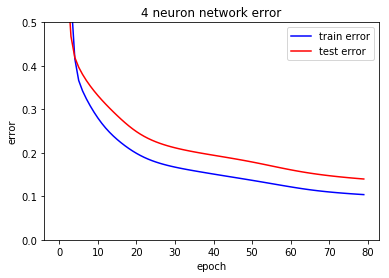

In [10]:
plt.plot(error_train,color='b',label='train error')
plt.plot(error_test,color='r',label='test error')

plt.xlabel("epoch")
plt.ylabel("error")
plt.ylim([0,0.5])
plt.title("4 neuron network error")
plt.legend()
plt.show()

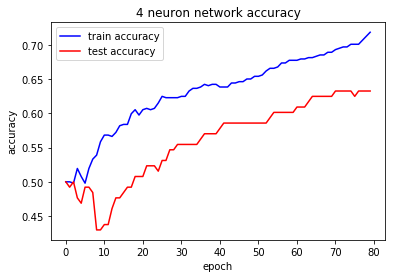

In [11]:
plt.plot(tr_accu,color='b',label='train accuracy')
plt.plot(te_accu,color='r',label='test accuracy')

plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("4 neuron network accuracy")
plt.legend()
plt.show()

In [12]:
# 12 neuron network
error_train, error_test, tr_accu, te_accu=train(x_train,y_train,x_test,y_test,hidden=12)

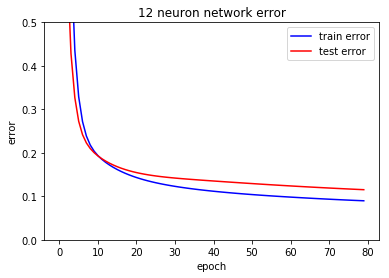

In [13]:
plt.plot(error_train,color='b',label='train error')
plt.plot(error_test,color='r',label='test error')

plt.xlabel("epoch")
plt.ylabel("error")
plt.ylim([0,0.5])
plt.title("12 neuron network error")
plt.legend()
plt.show()

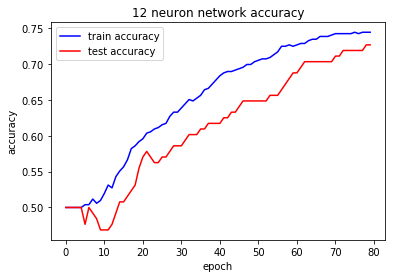

In [14]:
plt.plot(tr_accu,color='b',label='train accuracy')
plt.plot(te_accu,color='r',label='test accuracy')

plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("12 neuron network accuracy")
plt.legend()
plt.show()

In [ ]:
#inputSize = 784
# outputSize = 1
# hiddenSize = 8
        
# W1 = np.random.randn(hiddenSize, inputSize)
# W2 = np.random.randn(outputSize,hiddenSize)
        
# B1 = np.random.randn(hiddenSize,1)
# B2 = np.random.randn(outputSize,1)

# X=np.array(x_train)
# z1 = np.matmul(W1,X) + B1
# a1 = sigmoid(z1)
# z2 = (np.matmul(W2,a1) + B2).T
# y_cap = z2

# alpha =0.001

# d2 = y_cap - y_train
# d1 = np.matmul(d2,W2).T*sigmoid(z1,derivative=True)
        
# w2_error = np.matmul(d2.T,a1.T)
# w1_error = np.matmul(d1,X.T)
# b1_error = np.reshape(np.mean(d1,axis=1),(8,1))
# b2_error = np.mean(d2)

# W1 += w1_error * alpha
# W2 += w2_error * alpha
# B1 += b1_error * alpha
# B2 += b2_error * alpha

# W1,W2,B1,B2 = init_params(8)
# Z1,A1,y_cap = f_prop(W1,W2,B1,B2,x_train)

# w2_error,w1_error,b1_error,b2_error = back_prop(x_train,y_train,W1,W2,Z1,A1,y_cap)
# W1,W2,B1,B2 = update_params(W1,W2,B1,B2,w1_error,w2_error,b1_error,b2_error,0.001)


#     def sigmoid(x, derivative=False):
#         if derivative:
#             return 1/(1+np.exp(-x))*(1-1/(1+np.exp(-x)))
#         return 1 / (1 + np.exp(-x))

# def train_loss(y_cap,y):
#     sigma = 1/2 * ((y_cap-y)**2)
#     theta = 1/512 * sum(sigma)
#     return theta

# def train_accu(y_cap,y):
#     q = predictions(y_cap)
#     acc = 1 - 1/512 * sum(np.mod(q-y))
#     return acc

# def test_loss(y_cap,y):
#     sigma = 1/2 * ((y_cap-y)**2)
#     theta = 1/128 * sum(sigma)
#     return theta

# def test_accu(y_cap,y):
#     q = predictions(y_cap)
#     acc = 1 - 1/128 * sum(np.mod(q-y))
#     return acc